In [20]:
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import numpy as np
import pandas as pd 
import seaborn as sns 

from scipy.stats import mannwhitneyu

from src.config import DADOS_ORIGINAIS, DADOS_TRATADOS
from src.models import RANDOM_STATE

sns.set_theme(palette="bright")

In [21]:
df = pd.read_csv(DADOS_ORIGINAIS)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
with pd.option_context("display.float_format", "{:.2f}".format):
    display(df.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [15]:
df[df == 0].count()

Time           2
V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18            0
V19            0
V20            0
V21            0
V22            0
V23            0
V24            0
V25            0
V26            0
V27            0
V28            0
Amount      1825
Class     284315
dtype: int64

### Very Unbalanced Dataset

In [16]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [17]:
df.Class.value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

### Histograms

C:\Users\viniv\anaconda3\envs\ml_kernel\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


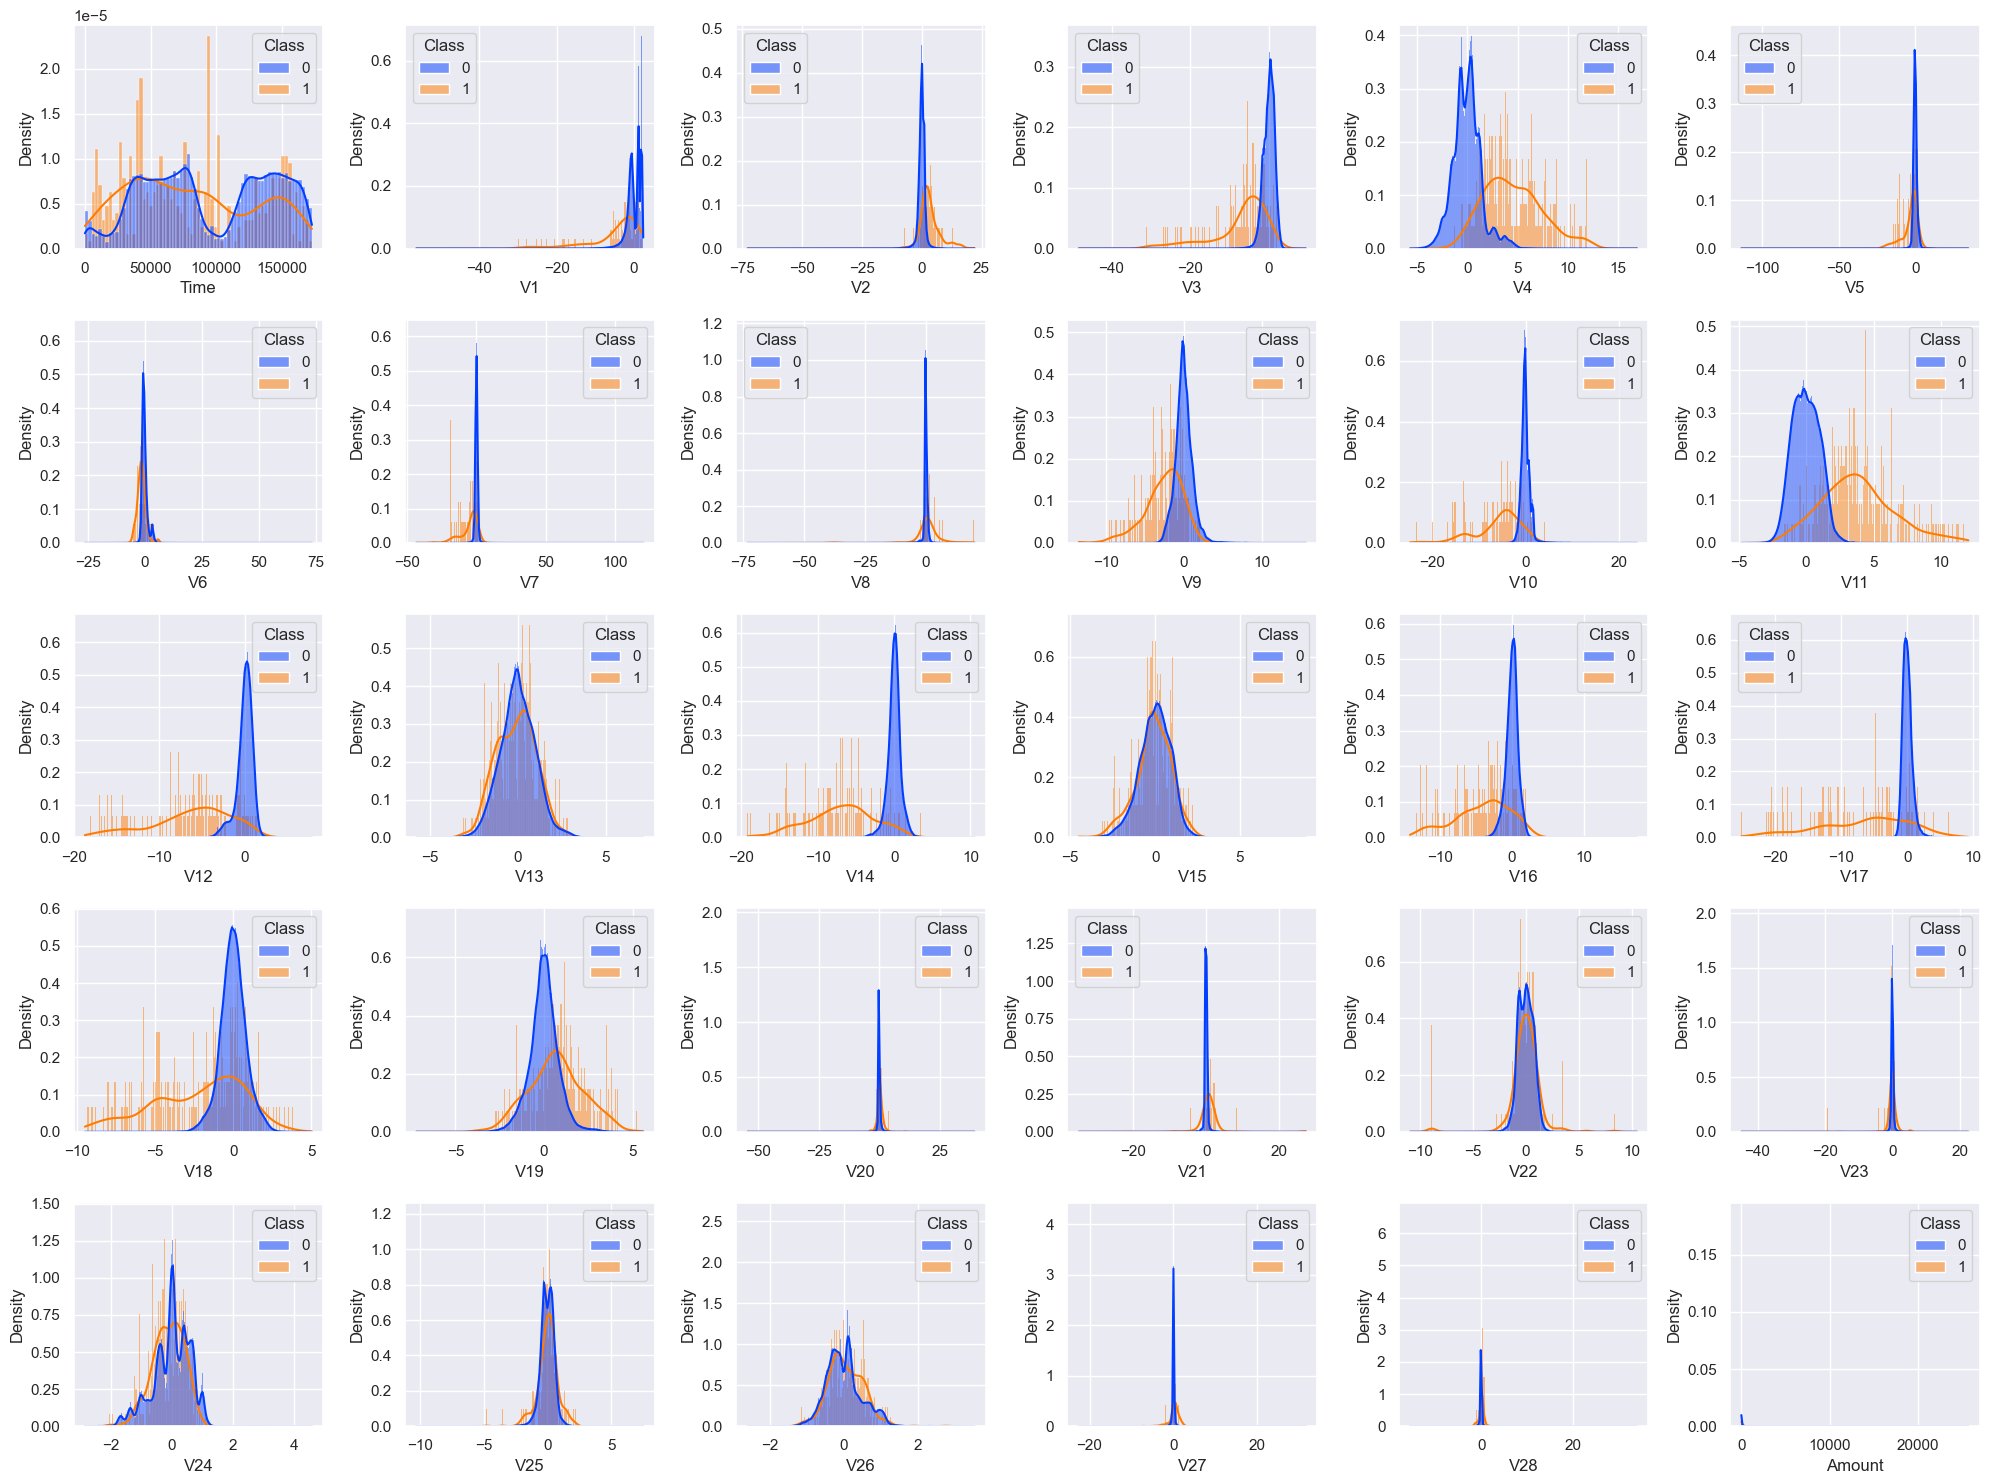

In [20]:
#takes time to load
fig, axs = plt.subplots(5, 6, figsize=(20,15))

for ax, coluna in zip(axs.flatten(), df.columns):
    sns.histplot(data=df, x=coluna, ax=ax, kde=True, hue="Class", stat="density", common_norm=False)

plt.tight_layout()
plt.show()

In [22]:
df_sample = df.groupby("Class").sample(n=492, random_state=RANDOM_STATE)

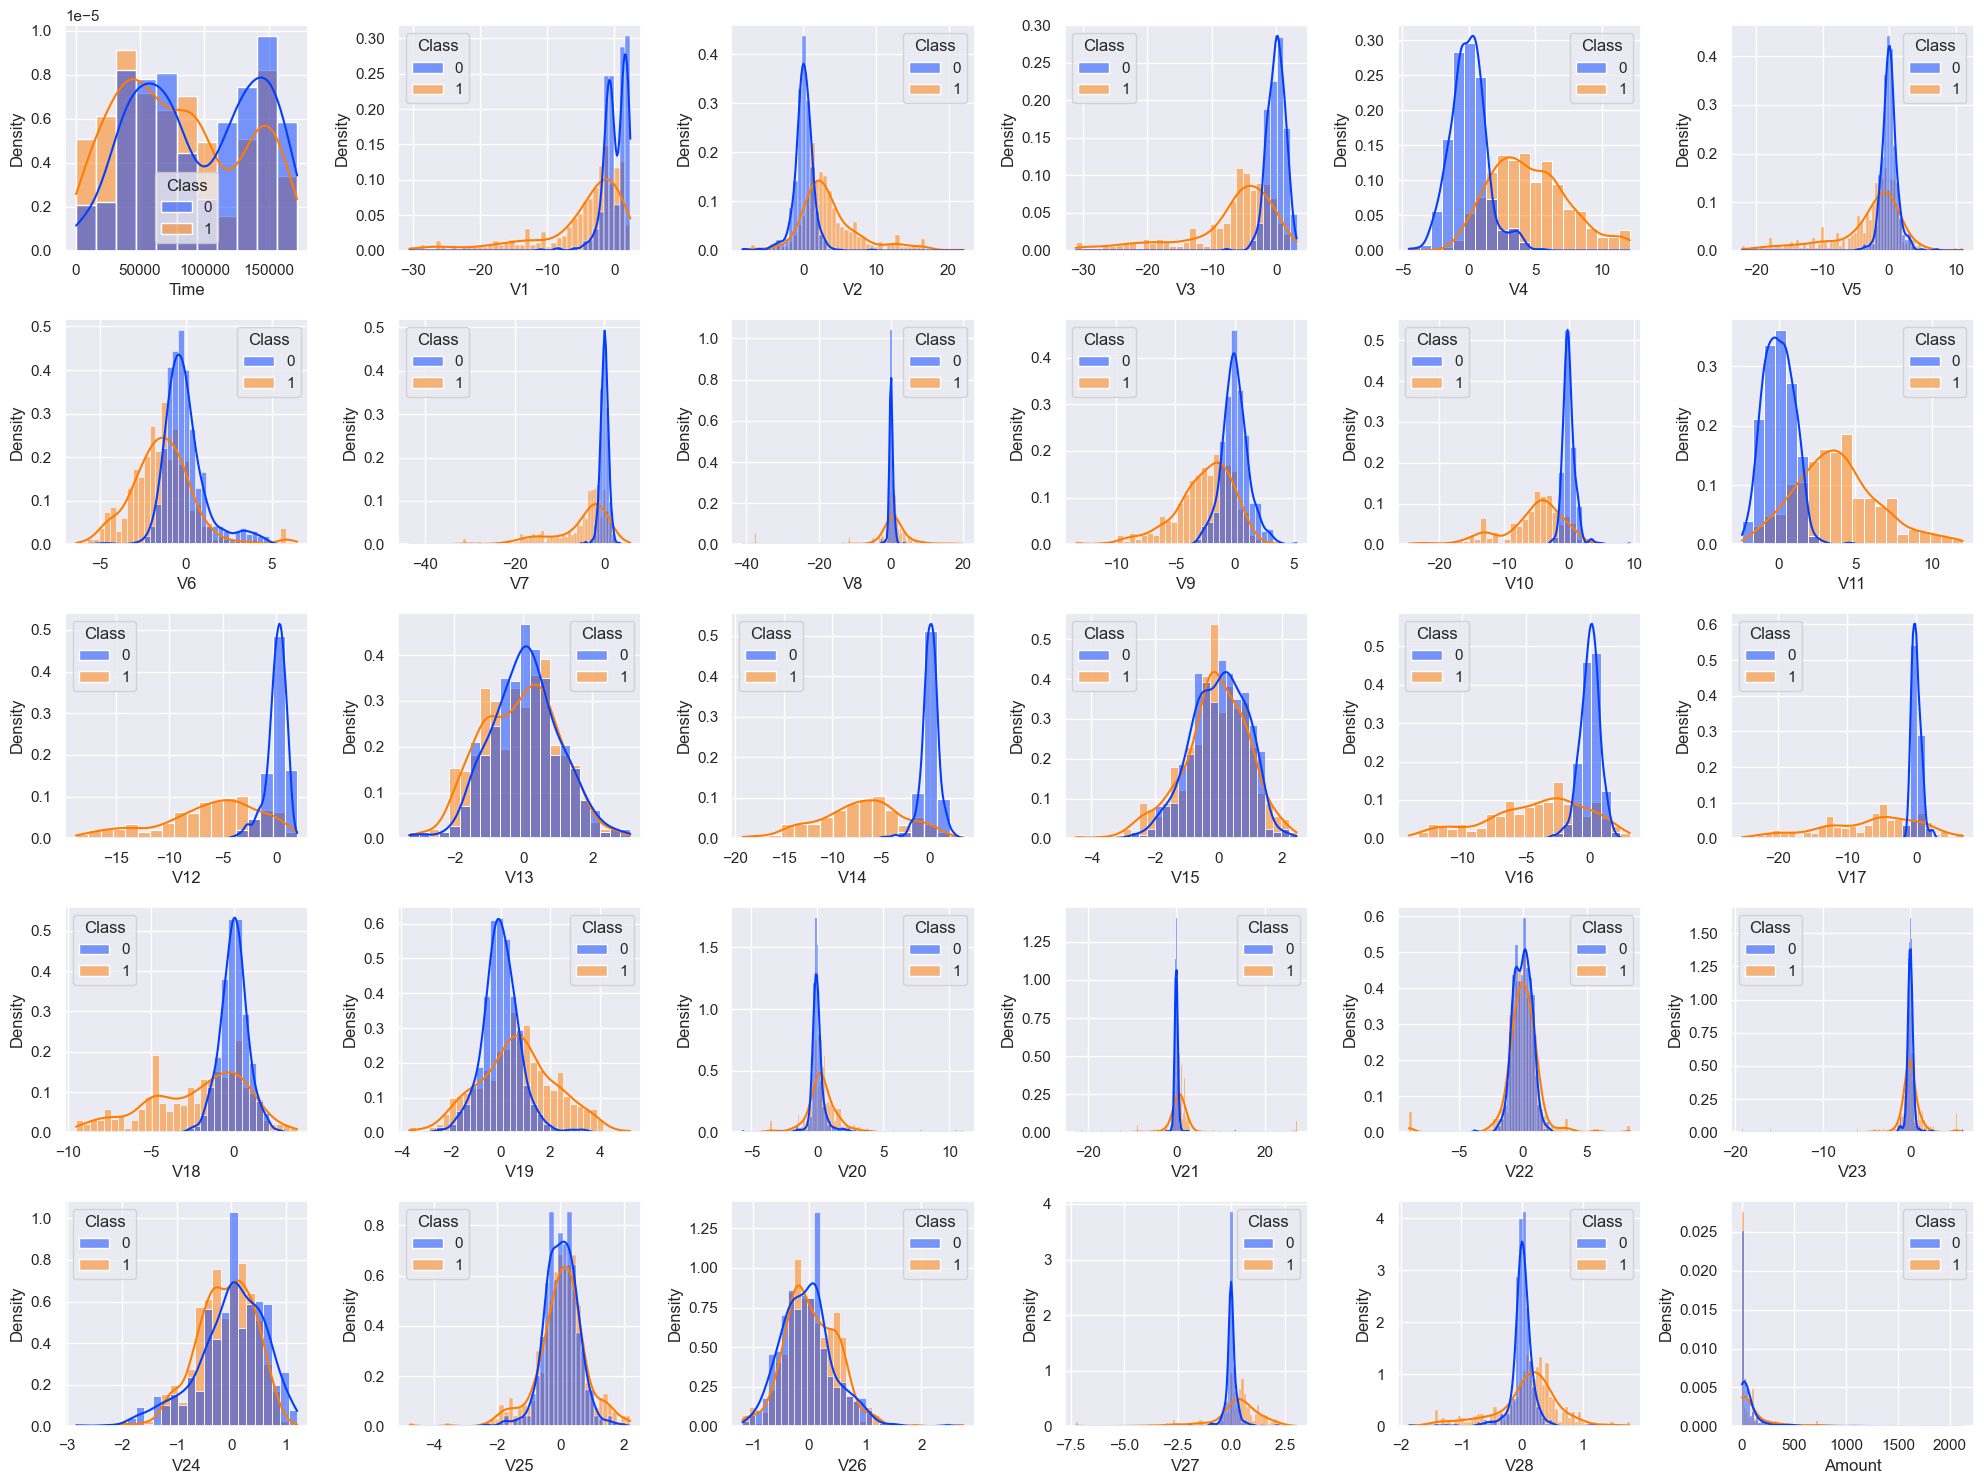

In [7]:
fig, axs = plt.subplots(5, 6, figsize=(20,15))

for ax, coluna in zip(axs.flatten(), df_sample.columns):
    sns.histplot(data=df_sample, x=coluna, ax=ax, kde=True, hue="Class", stat="density", common_norm=False)

plt.tight_layout()
plt.show()

### Boxplots and Correlations

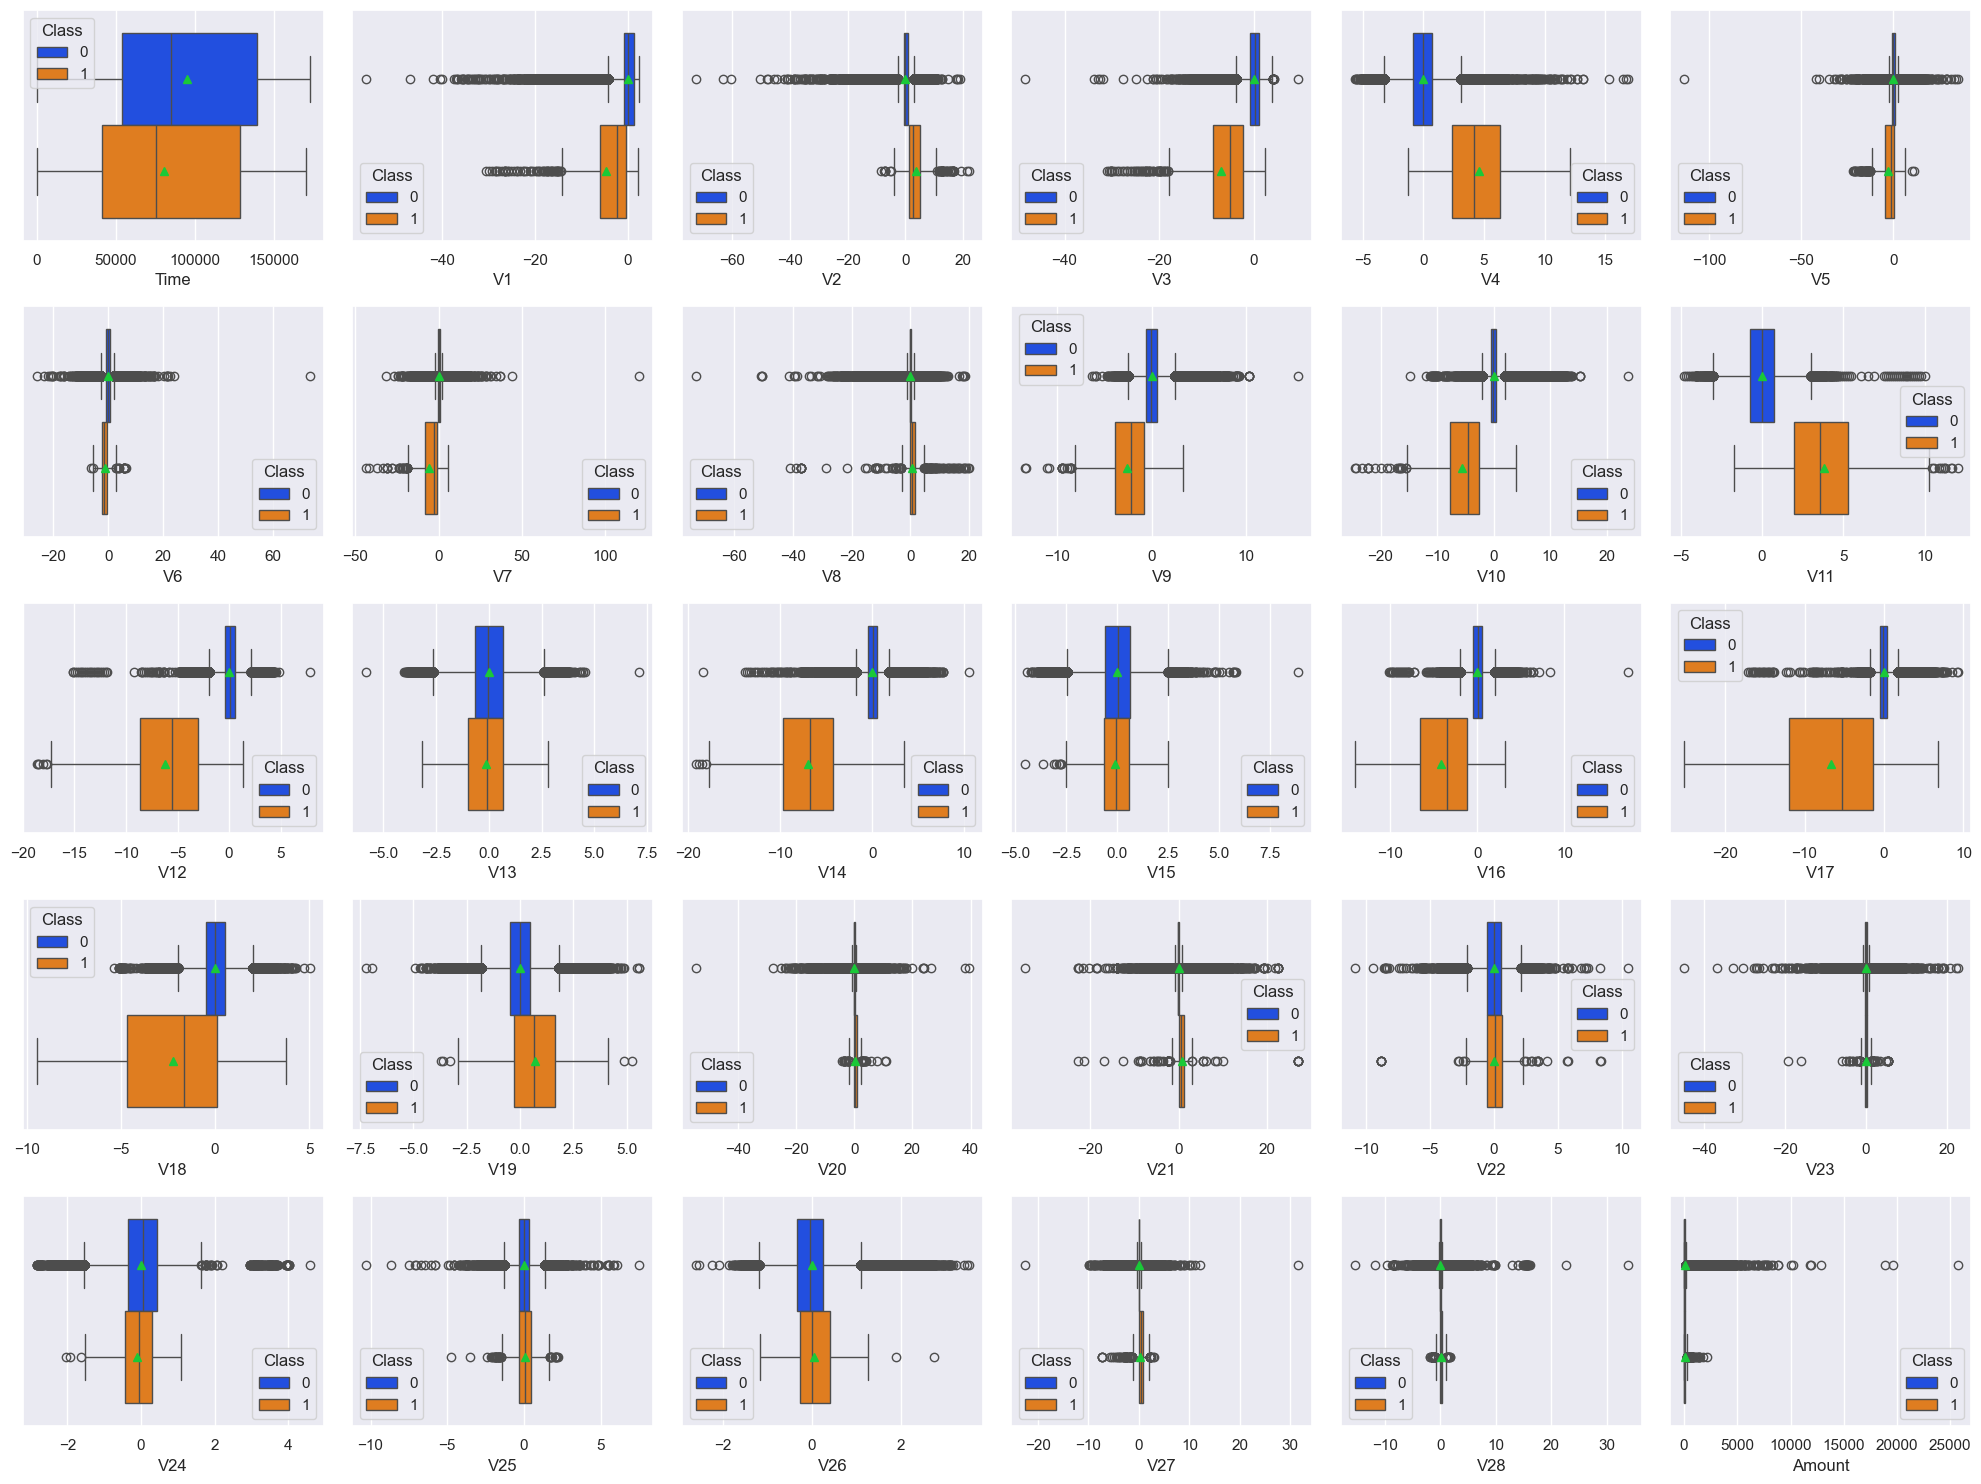

In [8]:
fig, axs = plt.subplots(5, 6, figsize=(20,15))

for ax, coluna in zip(axs.flatten(), df.columns):
    sns.boxplot(data=df, x=coluna, ax=ax, showmeans=True, hue="Class")

plt.tight_layout()
plt.show()

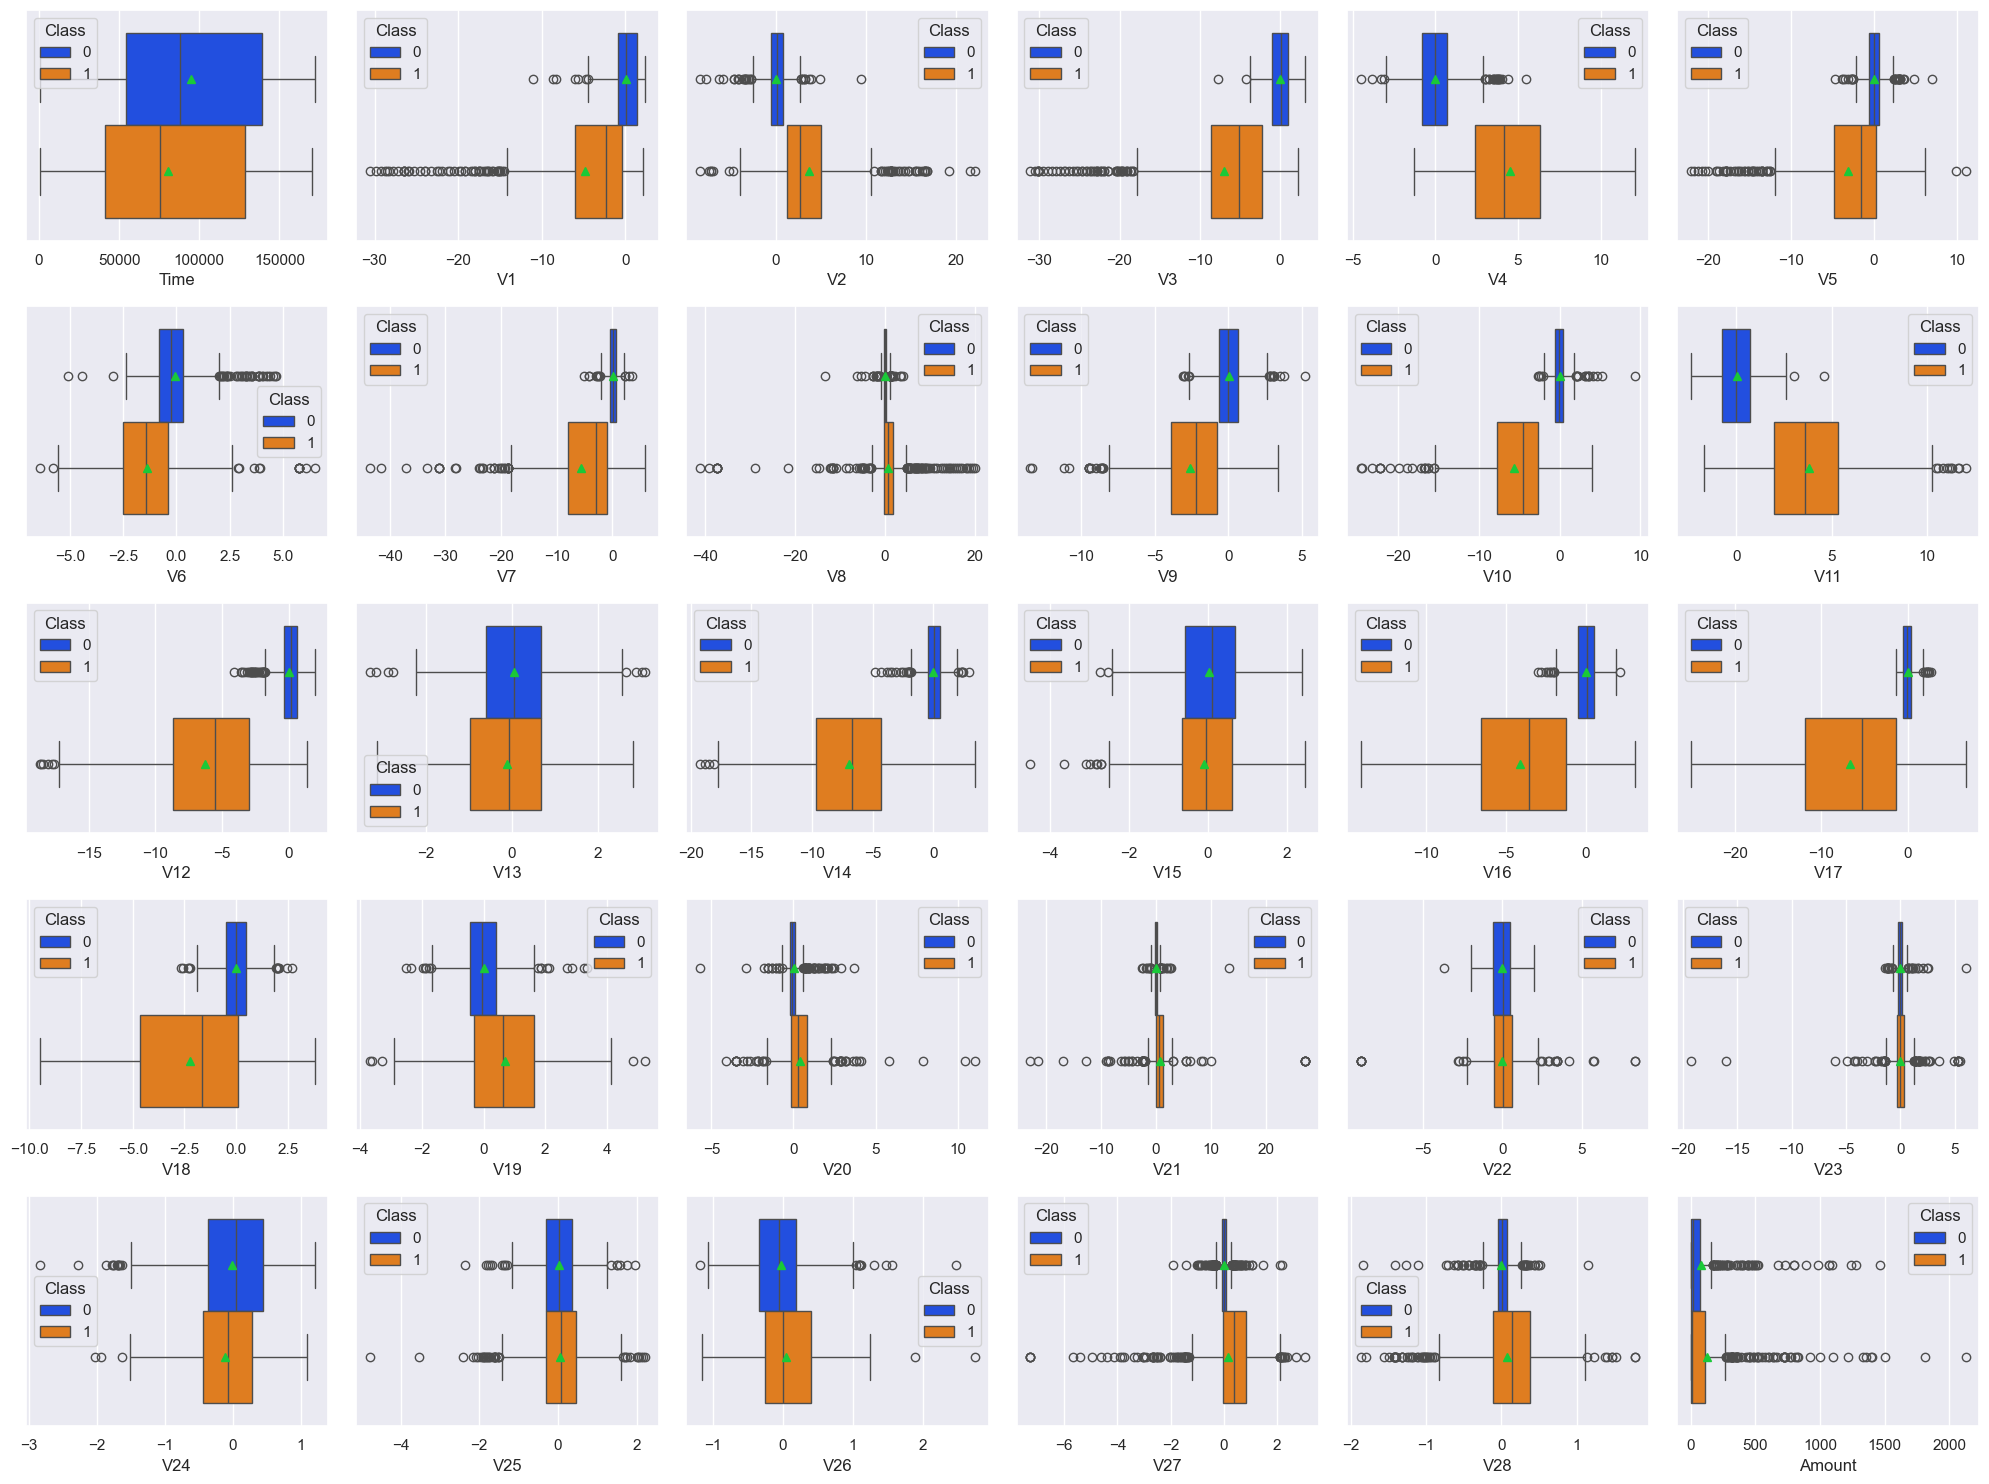

In [9]:
fig, axs = plt.subplots(5, 6, figsize=(20,15))

for ax, coluna in zip(axs.flatten(), df_sample.columns):
    sns.boxplot(data=df_sample, x=coluna, ax=ax, showmeans=True, hue="Class")

plt.tight_layout()
plt.show()

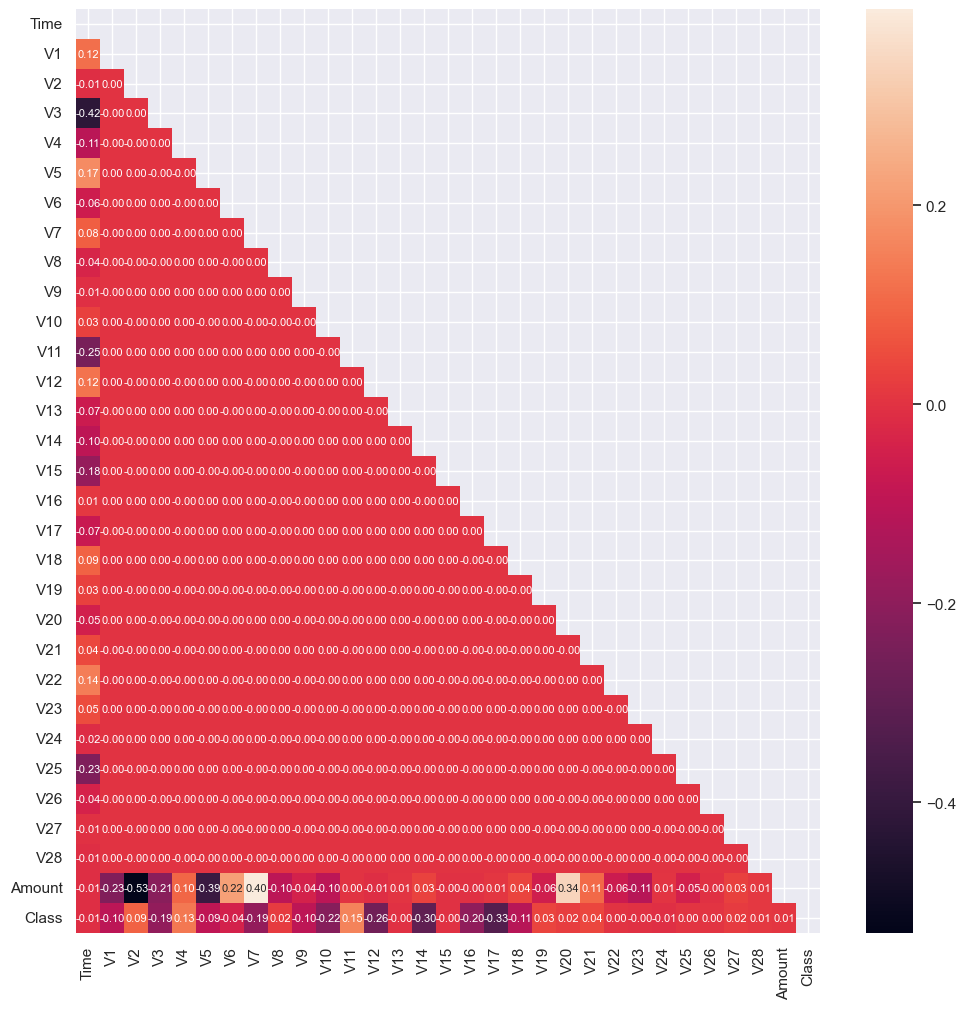

In [15]:
corr = df.select_dtypes("number").corr()


matriz = np.triu(corr)

fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(
    corr,
    mask=matriz,
    annot=True, 
    fmt=".2f",
    ax=ax,
    annot_kws={"fontsize": 8}
)

plt.show()

In [23]:
features = df.columns.drop("Class").to_list() 

target = "Class"

analise_mw ={}

classes = df[target].unique()

alfa = 0.01

group = df.groupby(target)

In [48]:
for coluna in features:
    group1 = group.get_group(classes[0])[coluna]
    group2 = group.get_group(classes[1])[coluna]

    statistic_mw, pvalue_mw = mannwhitneyu(group1, group2)
    analise_mw[coluna] = {
        "pvalue": pvalue_mw,
        "statistic": statistic_mw,
        "important_relation": pvalue_mw < alfa
    }

df_mw = pd.DataFrame(analise_mw).T

df_mw

,pvalue,statistic,important_relation
Time,0.0,81310602.0,True
V1,0.0,111193870.0,True
V2,0.0,20289296.0,True
V3,0.0,127583455.0,True
V4,0.0,8636598.0,True
V5,0.0,99256726.0,True
V6,0.0,107291012.0,True
V7,0.0,116915822.0,True
V8,0.0,47862020.0,True
V9,0.0,118073844.0,True


In [46]:
df_mw[df_mw['important_relation'] == False]

,pvalue,statistic,important_relation
V13,0.051215,73493959.0,False
V15,0.129508,72703847.0,False
V22,0.266395,67916421.0,False
V25,0.012463,65388547.0,False


### Outliers

In [ ]:
df_major = df[df["Class"] == 0]
df_minor = df[df["Class"] == 1]

In [31]:
def remove_quantil(df, var, quantil_inf=0.05, quantil_sup=0.95):
    df_filt = df.copy()
    for var in var:
        limit_inf = df[var].quantile(quantil_inf)
        limit_sup = df[var].quantile(quantil_sup)
        df_filt = df[(df[var] >= limit_inf) & (df[var] < limit_sup)]
    return df_filt

In [36]:
var = df.columns.drop("Class")

df_major_filt = remove_quantil(df_major, var)

df_major_filt.shape

(256088, 31)

In [38]:
df_without_outliers = pd.concat([df_major_filt, df_minor])

df_without_outliers.shape

(256580, 31)

In [40]:
df_without_outliers = df_without_outliers.reset_index(drop=True)

In [42]:
df_without_outliers.Class.value_counts()

Class
0    256088
1       492
Name: count, dtype: int64

### export

In [50]:
df_without_outliers = df_without_outliers.drop(
    columns=df_mw[df_mw['important_relation'] == False].index
)

In [53]:
df_without_outliers.to_parquet(DADOS_TRATADOS, index=False)